In [1]:
import nease
import pandas as pd

### Input of NEASE

In [2]:
# RNA-Seq data processed fron:  https://doi.org/10.1186/S13059-017-1286-Z
# Additional file 4 from the paper: Differential exon usage between DCM patients and controls.
# Prepare the standard input for DCM data
table_dcm=pd.read_json('AS data/dcm.json')
table_dcm

,Gene stable ID,new_start,new_end,beta
0,ENSG00000154263,69314431,69315425,-0.105828
1,ENSG00000154265,69314431,69315425,-0.105828
2,ENSG00000005471,87411893,87412033,0.135682
3,ENSG00000197150,151031241,151031291,0.150763
4,ENSG00000124574,43431751,43432141,0.107582
...,...,...,...,...
1022,ENSG00000162086,3313049,3313175,0.131544
1023,ENSG00000198482,52547512,52547638,-0.104090
1024,ENSG00000176371,84616309,84616614,-0.246228
1025,ENSG00000140987,3397745,3397787,-0.161007


## Run NEASE


In [3]:
# Run nease with standard input.
events=nease.run(table_dcm, organism='Human')



		Data Summary
**************************************************
239 protein domains are affected by AS.
120 of the affected domains have known interactions.
985 protein interactions/binding affected.

**************************************************
Running enrichment analysis...
NEASE enrichment done.


### Classic gene enrichment

In [4]:
# This is an enrichement at gene level: all (diff) spliced genes.
# The function use the library gseapy and need gseapy_databases parameter 
# let first check what libraries are available on gseapy for Human

import gseapy as gp
Human = gp.get_library_name(database='Human')
Human[:10]

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021']

In [5]:
# Run on KEGG gene set
events.classic_enrich(gseapy_databases=['KEGG_2019_Human']).head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2019_Human,Oxytocin signaling pathway,20/153,0.000001,0.000248,0,0,3.966191,54.487228,CAMK2B;CAMK2D;CAMK1D;PLA2G4B;CACNA2D3;PRKAG2;NFATC1;CACNA1C;ADCY1;ADCY6;CAMKK2;GNAO1;CACNB2;RCAN1;MYL6;PLCB4;MAPK1;PPP1R12B;PLCB1;PRKACB
1,KEGG_2019_Human,Adrenergic signaling in cardiomyocytes,19/145,0.000002,0.000248,0,0,3.973184,52.287538,CAMK2B;CAMK2D;CACNA2D3;CREM;ATP2B4;CACNA1C;PPP2R5C;ADCY1;ADRA1A;ADCY6;CACNB2;PLCB4;CREB3L2;AKT1;MAPK1;PLCB1;PRKACB;CREB5;RAPGEF4
2,KEGG_2019_Human,cAMP signaling pathway,21/212,0.000046,0.003428,0,0,2.895085,28.885419,CHRM2;CAMK2B;GABBR1;CAMK2D;BDNF;PTCH1;PDE4D;PTGER3;PDE4C;ATP2B4;NFATC1;ADCY1;CACNA1C;ADCY6;CREB3L2;AKT1;PLCE1;MAPK1;PRKACB;RAPGEF4;CREB5
3,KEGG_2019_Human,Aldosterone synthesis and secretion,13/98,0.000070,0.003428,0,0,4.005304,38.345050,CAMK2B;SCARB1;CAMK2D;CAMK1D;ATP2B4;CACNA1C;ADCY1;ADCY6;PLCB4;CREB3L2;PLCB1;PRKACB;CREB5
4,KEGG_2019_Human,Cholinergic synapse,14/112,0.000072,0.003428,0,0,3.743795,35.718190,CHRM2;CAMK2B;CAMK2D;CACNA1C;ADCY1;ADCY6;GNAO1;PLCB4;CREB3L2;AKT1;MAPK1;PLCB1;PRKACB;CREB5
5,KEGG_2019_Human,Insulin secretion,12/86,0.000080,0.003428,0,0,4.243428,40.044645,CAMK2B;CAMK2D;PLCB4;CREB3L2;KCNMA1;ADCY1;CACNA1C;PLCB1;PRKACB;ADCY6;RAPGEF4;CREB5
6,KEGG_2019_Human,Morphine addiction,12/91,0.000139,0.005118,0,0,3.973820,35.295379,GNAO1;GABBR1;PDE1C;GRK4;PDE4D;PDE1A;PDE4C;ARRB1;ADCY1;GABRE;PRKACB;ADCY6
7,KEGG_2019_Human,Dilated cardiomyopathy (DCM),11/91,0.000560,0.015659,0,0,3.592047,26.898165,CACNB2;ITGB4;ITGA1;CACNA2D3;DMD;ADCY1;CACNA1C;IGF1;PRKACB;ADCY6;TTN
8,KEGG_2019_Human,"Parathyroid hormone synthesis, secretion and action",12/106,0.000583,0.015659,0,0,3.337087,24.850156,PLCB4;PDE4D;CREB3L2;PDE4C;MAPK1;ARRB1;ADCY1;PLCB1;PRKACB;ADCY6;FGFR1;CREB5
9,KEGG_2019_Human,Cortisol synthesis and secretion,9/65,0.000650,0.015659,0,0,4.192328,30.767223,SCARB1;PLCB4;CREB3L2;ADCY1;CACNA1C;PLCB1;PRKACB;ADCY6;CREB5


### NEASE analysis


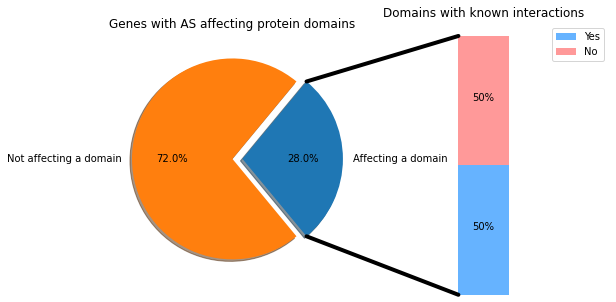

In [6]:
events.get_stats()

In [7]:
# Get list of all protein domais affected by AS.
# A link to DIGGER database for lost/gained domain and their binding.

events.get_domains().head(10)

,Gene name,NCBI gene ID,Gene stable ID,Exon stable ID,Pfam ID,dPSI,Interacting domain,Visualization link
0,ZC3HAV1,56829,ENSG00000105939,ENSE00001939369,PF02825,-0.675285,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00001939369
1,PLXNA4,91584,ENSG00000221866,ENSE00001477854,PF01403,-0.579010,False,
2,ALS2,57679,ENSG00000003393,ENSE00001844466,PF00415,-0.510964,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00001844466
3,XRN1,54464,ENSG00000114127,ENSE00001810566,PF17846,-0.479034,False,
4,ZNF655,79027,ENSG00000197343,ENSE00003602592,PF01352,-0.458799,False,
5,NFASC,23114,ENSG00000163531,ENSE00001556394,PF07679,-0.433055,False,
6,MCM9,254394,ENSG00000111877,ENSE00001356493,PF00493,-0.428684,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00001356493
7,DENND1B,163486,ENSG00000213047,ENSE00001196169,PF03455,-0.425418,False,
8,ALG13,79868,ENSG00000101901,ENSE00003760070,PF04101,-0.411372,False,
9,NUP98,4928,ENSG00000110713,ENSE00001527022,PF04096,-0.410950,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00001527022


In [8]:
# List of affected interactions (domain binding)

events.get_edges().head(10)

,Gene name,NCBI gene ID,dPSI,Pfam ID,Number of affected interactions,Affected binding,Affected binding (NCBI)
0,WWP2,11060,-0.185343,PF00397,88,"RBM34,CPSF6,MPP5,SRPK1,SRPK2,DVL2,IQGAP1,EWSR1,ARRDC1,FLNA,IGF2BP1,SRSF5,U2AF1,PDLIM7,G3BP1,HNRNPL,SFPQ,PABPC4,TRA2A,SRSF1,ALYREF,LARP7,SNRNP70,SF3B4,RBM17,ZNF638,CDK9,WWP1,HNRNPH1,TJP1,HNRNPA0,HNRNPD,HNRNPM,RBM10,OGT,SAFB,U2SURP,SRSF2,G3BP2,PABPC1,POLR2A,TAF15,HNRNPF,HNRNPA2B1,RBM28,MKNK2,CSNK2A1,SRSF7,SRSF6,DVL1,ITCH,HNRNPA1,LIN7C,TXNIP,SRSF3,PATJ,SART3,RBM39,CPSF7,TAGLN2,SYNCRIP,NIFK,NONO,POLR2C,WWP2,SHC1,HNRNPH3,EIF3G,NCL,SNRPB2,DAZAP1,RPAP3,HNRNPC,HNRNPA3,SRSF10,ELAVL1,PTBP1,HNRNPR,RALY,RBM14,IGF2BP2,RBMX,ARRDC4,NELFE,U2AF2,ARRDC3,EIF3B,NCBP2","23029,11052,64398,6732,6733,1856,8826,2130,92714,2316,10642,6430,7307,9260,10146,6421,3191,8761,29896,6426,10189,51574,6625,10262,84991,27332,1025,11059,3187,7082,10949,3184,4670,8241,8473,6294,23350,6427,9908,26986,5430,8148,3185,3181,55131,2872,1457,6432,6431,1855,83737,3178,55327,10628,6428,10207,9733,9584,79869,8407,10492,84365,4841,5432,11060,6464,3189,8666,4691,6629,26528,79657,3183,220988,10772,1994,5725,10236,22913,10432,10644,27316,91947,7936,11338,57561,8662,22916"
1,ESR2,2100,-0.302430,PF00104,78,"BMP2K,WNK1,PTPRK,CDK13,ESR1,MAPKAPK2,FNDC3B,SRPK1,SRPK2,NR2F2,TRIO,RPS6KB1,TTK,PRKCI,MID1,CLK3,DAPK3,ADNP,KPNA1,VRK2,TAOK2,CUX1,CSNK1G3,MEOX2,NCOA2,NR2F6,SCYL2,NCAM2,CDK9,CERS2,CAMK2D,ESRRB,ESR2,CDK19,ZHX3,PRAG1,ZHX2,PTPRF,MARK3,NCOA1,CDK11B,PBX1,MKNK2,CSNK2A1,DYRK1A,ARNT,MINK1,SCYL1,RPS6KA4,MAPK3,NCOA3,PRPF4B,PKP4,OXSR1,MAPK1,RPS6KB2,TLK2,ARVCF,CIT,CDK8,LMX1B,EIF2AK2,GAK,CDC42BPB,CTNNB1,NKX2,EPHA4,STK26,CSNK1A1,MYLK2,MARK2,PIK3R4,ZFHX3,PEAK1,CDK12,SIX4,CDC42BPG,TBK1","55589,65125,5796,8621,2099,9261,64778,6732,6733,7026,7204,6198,7272,5584,4281,1198,1613,23394,3836,7444,9344,1523,1456,4223,10499,2063,55681,4685,1025,29956,817,2103,2100,23097,23051,157285,22882,5792,4140,8648,984,5087,2872,1457,1859,405,50488,57410,8986,5595,8202,8899,8502,9943,5594,6199,11011,421,11113,1024,4010,5610,2580,9578,1499,159296,2043,51765,1452,85366,2011,30849,463,79834,51755,51804,55561,29110"
2,CLK1,1195,0.140012,PF00069,69,"NCL,KIF14,HTATSF1,ANKFY1,PHLDB2,HIVEP1,MFHAS1,SRSF7,PTPN22,SRSF6,TRA2B,CWC27,ZNF148,RLF,SRPK1,STIP1,MAP3K21,H2BC12,UBL5,HNRNPA0,SRPK2,PPIG,HNRNPA1,CENPE,ABCA13,CELSR3,WDR66,STK31,SVOP,HNRNPA3,PATZ1,GEMIN5,MYOM1,UNC13B,RAPH1,RBM15,MKRN2,PPP1CB,YWHAG,KIF23,TJP2,SRSF3,RBM39,SRSF5,RASL12,CLK2,CTNND2,SAFB,PRPF4B,SFMBT2,DNAJC13,RBMX,PPFIBP2,ISG15,CLK1,FAT1,TRA2A,GRM6,SPEN,SRSF1,DNAJC24,THY1,CDK12,DBR1,CUL3,AC020929.1,IMPDH2,BAG3,ARHGEF12","4691,9928,51479,27336,90102,3096,9258,6432,26191,6431,6434,10283,6733,7707,6018,10963,6732,84451,85236,59286,10949,9360,3178,1062,154664,1951,144406,56164,55530,220988,23598,25929,8736,10497,65059,64783,23609,5500,7532,9493,9414,6428,9584,6430,51285,1196,1501,6294,8899,57713,23317,27316,8495,9636,1195,2195,29896,2916,23013,6426,120526,7070,51755,51163,8452,57731,3615,9531,23365"
3,FGFR1,2260,0.119626,PF00047,53,"SH3BP2,PLCG2,AGER,CRK,MFHAS1,FGFR1,PLCG1,AKT1,CDK9,SHB,CD79B,STAT3,RPS6KA3,PIK3R1,PIK3R2,CEACAM21,ITK,AP006333.1,FCGRT,PDGFRB,RAET1E,CTNNB1,OPCML,CRKL,JAK2,ANOS1,EPHA4,SLA,FGFR2,PTPN11,SRC,RPS6KA1,TNFRSF10B,SHE,RASA1,LTBR,L1CAM,YES1,NCK1,PTPN1,IL27RA,VAV1,NECTIN1,DLK1,NCK2,TNS2,GRB14,SHC1,NCAM1,PTK6,SCN3B,HEPACAM2,LRRN2","6452,177,5336,1398,9258,2260,5335,207,1025,6461,974,6774,6197,5295,5296,90273,3702,23769,2217,5159,135250,1499,4978,1399,3717,3730,2043,6503,2263,5781,6714,6195,8795,126669,5921,4055,3897,7525,4690,5770,9466,7409,5818,8788,8440,23371,2888,6464,4684,5753,55800,253012,10446"
4,MYO19,80179,-0.154152,PF00063,51,"BMP2K,ACTN4,ACTG1,GNB2,MYO10,CORO1C,MYO18A,SPTAN1,TPM2,MYH9,TJP1,TPM1,WDR1,SPTBN2,MAPK14,ACTR10,PPP1R9B,IQGAP1,MYO6,TPM4,AHNAK,MYO1C,MYL10,PHKG2,LMO7,COBL,ACTR2,ARPC1B,DAPK3,MYO1E,TJP2,MYL12A,MYL2,ACTR3,MYL6,MYO5C,MYO5A,MYH10,MYLK,CORO2A,MYO5B,MYO1B,PPP1R9A,SPTBN1,CORO1B,CTTN,SIPA1,INF2,ACTN1,TPM3,ERBIN","55589,81,2783,71,4651,23603,399687,6709,7169,4627,7082,7168,9948,6712,1

### NEASE edge enrichment 

In [9]:
# Run nease enrichment on affected edges
events.enrich(database=['KEGG']).head(15)

NEASE enrichment for the pathway databases:
 ['KEGG']
Found 1 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,path:hsa04080,Neuroactive ligand-receptor interaction - Homo sapiens (human),KEGG,"GABBR1 (1), CLK1 (1), ARRB1 (11), ADRA1A (2), GNAO1 (5)",0.000013,0.004114,22.529571
1,path:hsa04261,Adrenergic signaling in cardiomyocytes - Homo sapiens (human),KEGG,"PPP2R5C (9), ESR2 (3), ERBB3 (2), TTN (1), USP49 (1), ZHX1 (1), GRK4 (1), MYO19 (6), CLK1 (1), SPTAN1 (1), ARRB1 (2), FGFR1 (1), XIAP (1), MAF (1), ADRA1A (2), CACNA1C (2), GNAO1 (4)",0.002597,0.416871,13.311921
2,path:hsa04514,Cell adhesion molecules (CAMs) - Homo sapiens (human),KEGG,"IL1RAP (1), CXCL12 (1), ESR2 (2), ERBB3 (4), PCDH1 (1), MBP (1), FGFR1 (3)",0.013329,0.739595,10.576386
3,path:hsa04022,cGMP-PKG signaling pathway - Homo sapiens (human),KEGG,"PPP2R5C (3), ESR2 (3), ERBB3 (1), TTN (2), NFATC1 (1), NPR3 (1), ZHX1 (1), GRK4 (1), MYO19 (1), ELK4 (1), CLK1 (1), SPTAN1 (1), ARRB1 (4), FGFR1 (1), XIAP (1), PPP1R12B (1), MAF (1), ADRA1A (2), CACNA1C (1), GNAO1 (5)",0.013824,0.739595,10.487083
4,path:hsa04810,Regulation of actin cytoskeleton - Homo sapiens (human),KEGG,"ANKRD11 (2), HERC2 (1), PPP2R5C (3), CXCL12 (2), ESR2 (3), ERBB3 (2), PRDM2 (1), GIT2 (1), TTN (6), PTGER3 (2), WWP2 (1), NCAM1 (1), TNC (2), MYO19 (11), TSSK1B (1), PTPN18 (1), CLK1 (2), SPTAN1 (3), FGFR1 (9), USP53 (1), PPP1R12B (1), ABI2 (4)",0.044616,1.000000,9.833615
5,path:hsa04020,Calcium signaling pathway - Homo sapiens (human),KEGG,"HERC2 (1), CXCL12 (1), ESR2 (2), ERBB3 (5), TTN (1), USP49 (1), TNC (1), GRK4 (1), MYO19 (2), PTPN18 (1), ARRB1 (4), FGFR1 (3), ADRA1A (2), CACNA1C (2), GNAO1 (1)",0.010982,0.739595,9.023007
6,path:hsa05110,Vibrio cholerae infection - Homo sapiens (human),KEGG,"SEC24A (1), SLC22A23 (1), ERBB3 (1), MAGIX (2), USP49 (1), WWP2 (1), MYO19 (3), CLK1 (1), SPTAN1 (1), FGFR1 (2)",0.012810,0.739595,8.715080
7,path:hsa04670,Leukocyte transendothelial migration - Homo sapiens (human),KEGG,"HERC2 (2), CXCL12 (2), ESR2 (1), TTN (2), PTGER3 (2), MYO19 (8), CLK1 (1), NCF4 (2), FGFR1 (8), GNAO1 (3)",0.045134,1.000000,7.588820
8,path:hsa04924,Renin secretion - Homo sapiens (human),KEGG,"ERBB3 (1), USP49 (1), GRK4 (1), ARRB1 (4), CACNA1C (1), GNAO1 (3)",0.039395,1.000000,7.231711
9,path:hsa00310,Lysine degradation - Homo sapiens (human),KEGG,"ZNF644 (4), PRDM2 (1), PHF19 (4), BCL11A (1)",0.016714,0.766443,7.086731


### Pathway specific analysis

In [10]:
# Dilated cardiomyopathy (DCM) - Homo sapiens (human) is 7 on the list
# run path_analysis() with DCM pathway id for more details about diff. spliced genes are their affected interactions
events.path_analysis('path:hsa05414')

Enrichment of the pathway: Dilated cardiomyopathy (DCM) - Homo sapiens (human).

Overall p_value:  0.03372116585183135




,Spliced genes,NCBI gene ID,Gene knwon to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,MYO19,80179,False,6/51,0.000002,"ACTG1,TPM2,TPM1,TPM4,MYL2,TPM3","71,7169,7168,7171,4633,7170"
1,OBSCN,84033,False,1/2,0.014717,TTN,7273
2,USP49,25862,False,1/4,0.029217,PRKACA,5566
3,CACNA1C,775,True,1/4,0.029217,RYR2,6262
4,ERBB3,2065,False,1/18,0.124924,PRKACA,5566
5,ARRB1,408,False,1/21,0.144174,ADRB1,153
6,TTN,7273,True,1/24,0.163000,MYBPC3,4607
7,SPTAN1,6709,False,1/35,0.228561,MYH7,4625


In [11]:
# the gene MYO10 and OBSCN looks interesting, let us see what domain got affected and if the psi is positive or negative
events.get_edges()[ events.get_edges() ['Gene name']=='OBSCN' ]

,Gene name,NCBI gene ID,dPSI,Pfam ID,Number of affected interactions,Affected binding,Affected binding (NCBI)
80,OBSCN,84033,-0.191164,PF07679,2,"TTN,ANK1","286,7273"


### Visualization

In [12]:
# Finally we can visualize affected pathways with nease
# Again we run it on DCM pathway
# you can run this function several times to get a  better visualization

events.Vis_path('path:hsa05414',file='AS data/enrichment/',k=0.8)

Enrichment of the pathway: Dilated cardiomyopathy (DCM) - Homo sapiens (human).

Overall p_value:  0.03372116585183135


Visualization of the pathway generated in: AS data/enrichment/Dilated cardiomyopathy (DCM) - Homo sapiens (human).html


In [13]:
events.Vis_path('path:hsa04261',file='AS data/enrichment/',k=0.8)

Enrichment of the pathway: Adrenergic signaling in cardiomyocytes - Homo sapiens (human).

Overall p_value:  0.0025973275689903288


Visualization of the pathway generated in: AS data/enrichment/Adrenergic signaling in cardiomyocytes - Homo sapiens (human).html
